In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exponential regression

### Prediction

$$
\begin{align*}
y &= A \exp{(\mathbf{w^\intercal x})} \\
\end{align*}
$$

### Derivation using the linear model

$$
\begin{align*}
y &= A \exp{(\mathbf{w^\intercal x})} \\
\log{y} &= \log{A} + \mathbf{w^\intercal x}
\end{align*}
$$

In [2]:
class ExponentialRegression:

    def fit(self, X, y):
        X = np.hstack((np.ones((len(X), 1)), X))
        self.weights = np.dot(np.linalg.pinv(X), np.log(y))
        self.bias = np.exp(self.weights[0])
        self.weights = self.weights[1:]

    def predict(self, X):
        return self.bias * np.exp(np.dot(X, self.weights))

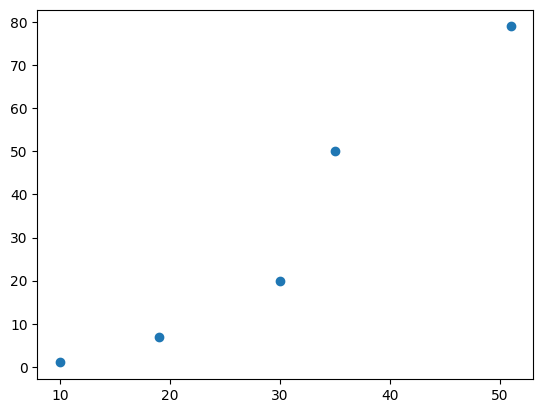

In [3]:
X = np.array([10, 19, 30, 35, 51])
y = np.array([1, 7, 20, 50, 79])

plt.scatter(X, y)
plt.show()

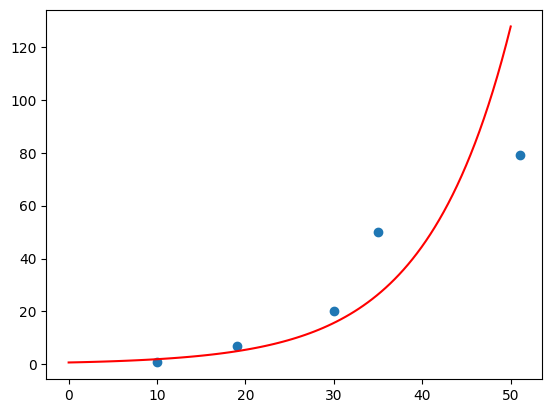

In [4]:
model = ExponentialRegression()
X = X.reshape(-1, 1)
model.fit(X, y)

x = np.linspace(0, 50, 100)

plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()

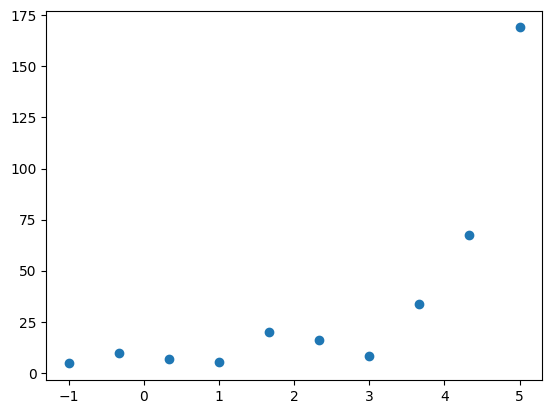

In [54]:
def make_exponential_regression(n_samples, noise):
    X = np.linspace(-1, 5, n_samples)
    y = np.exp(X) + np.random.normal(0, noise, n_samples)
    y = np.where(y < 0.1, np.abs(y), y)
    return X, y

X, y = make_exponential_regression(10, noise=10)

plt.scatter(X, y)
plt.show()

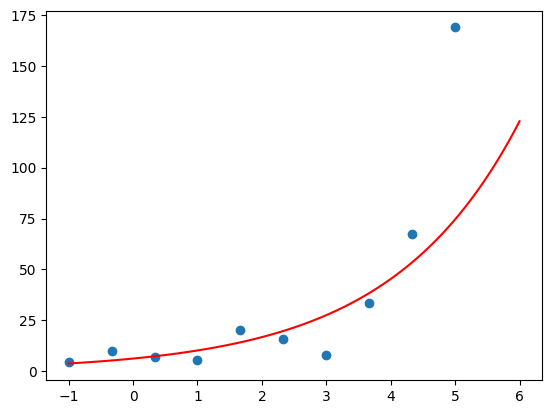

In [55]:
model = ExponentialRegression()
model.fit(X.reshape(-1, 1), y)

x = np.linspace(-1, 6, 100)

plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()